<p style="text-align: right">
  <img src="../images/dtlogo.png" alt="Logo" width="200">
</p>

# 💻 PID controller homework

In this exercise you will have to write the code for a PID controller tasked to command the angular speed of your Duckiebot to drive it from a given initial condition to a lateral position of $y_{ref} = 0.2 \text{m}$. 

Your robot will have to rely on its own odometry to estimate its current position.

**Note**: the function(s) used to compute the odometry will be taken from your previous answers in the [odometry activity](../04-Odometry/odometry_activity.ipynb). Make sure you're happy about them, too!

The Duckiebot's speed is constant and given: $v_0 = 0.2$. 

May the duck be with you!

In [ ]:
import numpy as np

In [110]:
# write the PID controller function for y postion control.

# **DO NOT CHANGE THE NAME OF THE FUNCTION**, it will break things

def PIDController(
    v_0,
    y_ref,
    y_hat, 
    prev_e_y, 
    prev_int_y, 
    delta_t):
    """
    Args:
        v_0 (:double:) linear Duckiebot speed (given).
        y_ref (:double:) reference lateral post
        y_hat (:double:) the current estiamted pose along y.
        prev_e_y (:double:) tracking error at previous iteration.
        prev_int_y (:double:) previous integral error term.
        delta_t (:double:) time interval since last call.
    returns:
        u (:double:) 1x2 array of commands for the Duckiebot: [v0, omega] 
        current_e (:double:) current tracking error (automatically becomes prev_e_y at next iteration).
        current_int_e (:double:) current integral error (automatically becomes prev_int_y at next iteration).
    """
    
    # error
    e_y = y_ref - y_hat

    # integral of the error
    e_int_y = prev_int_y + e_y*delta_t  
    
    # antiwindup
    e_int_y = max(min(e_int_y,0.5),-0.5)

    # derivative of the error
    e_der_y = (e_y - prev_e_y)/delta_t

    # PID parameters sim (v0 = 0.2, yref = 0.2 then -0.1)

#     Kp_y= 9
#     Ki_y= 0.02
#     Kd_y= 120

    # PID parameters robot (v0=0.2, yref = 0.1 then -0.2)
    Kp_y= 9
    Ki_y= 0.05
    Kd_y= 12
    
    # PID controller for omega
    omega = Kp_y*e_y + Ki_y*e_int_y + Kd_y*e_der_y
    
    u = [v_0, omega]
    

    print(f"\n\nDelta time : {delta_t} \nE : {e_y} \ne_int : {e_int_y} \ne_der : {e_der_y} \nU : {u} \ny_hat: {y_hat} \ny_ref: {y_ref}")

    
    return u, e_y, e_int_y


## Outcome Examples 

Here are some examples of stable outcomes (not necessarily the best you can get):

### 💻 Simulation 

<figure>
  <div style="text-align:center;">
  <img src="../images/pid-control/pid-lateral-sim-good.png" alt="pid-lateral-sim-1" style="width: 300px;"/>
  <figcaption> Simulation, lateral PID control. $v_{0} = 0.2$, $\theta_{ref} = [0.2, -0.1]$. </figcaption>
  </div>
</figure>

### Duckiebot

<figure>
  <div style="text-align:center;">
  <img src="../images/pid-control/pid-lateral-real-good.png" alt="pid-lateral-real-1" style="width: 300px;"/>
  <figcaption> Duckiebot, lateral PID control. $v_{0} = 0.2$, $\theta_{ref} = [0.2, -0.2, 0.2]$. </figcaption>
  </div>
</figure>

### Sanity Check



Delta time : 0.2 
E : 0.2 
e_int : 0.04000000000000001 
e_der : 1.0 
U : [0.2, 0.7408] 
y_hat: 0.0 



Delta time : 0.2 
E : 0.2 
e_int : 0.08000000000000002 
e_der : 0.0 
U : [0.2, 0.24159999999999998] 
y_hat: 0.0 



Delta time : 0.2 
E : 0.19409525833008043 
e_int : 0.11881905166601611 
e_der : -0.029523708349597916 
U : [0.2, 0.22052883685461788] 
y_hat: 0.005904741669919594 



Delta time : 0.2 
E : 0.18628652741927135 
e_int : 0.1560763571498704 
e_der : -0.039043654554045404 
U : [0.2, 0.2071435327691003] 
y_hat: 0.013713472580728654 



Delta time : 0.2 
E : 0.17675566487104188 
e_int : 0.19142749012407878 
e_der : -0.047654312741147314 
U : [0.2, 0.19210819127715817] 
y_hat: 0.023244335128958123 



Delta time : 0.2 
E : 0.16562402056562436 
e_int : 0.22455229423720366 
e_der : -0.055658221527087604 
U : [0.2, 0.17541075979994952] 
y_hat: 0.03437597943437565 



Delta time : 0.2 
E : 0.15302480041296973 
e_int : 0.25515725431979763 
e_der : -0.06299610076327317 
U : [0.2, 0.

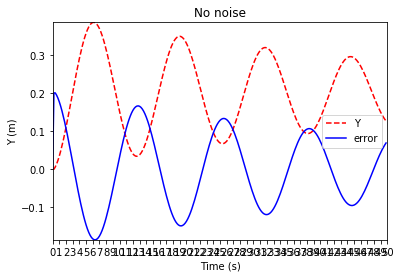

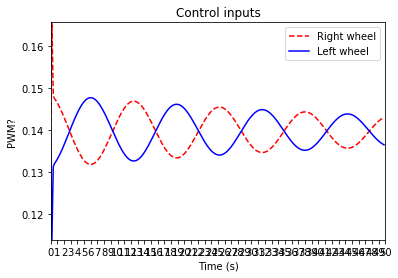



Delta time : 0.2 
E : 0.20644209116240486 
e_int : 0.04128841823248097 
e_der : 1.0322104558120242 
U : [0.2, 0.7646615056655476] 
y_hat: -0.0064420911624048435 



Delta time : 0.2 
E : 0.20721384117115396 
e_int : 0.08273118646671176 
e_der : 0.0038587500437455013 
U : [0.2, 0.2522406081565917] 
y_hat: -0.007213841171153944 



Delta time : 0.2 
E : 0.20117430755541205 
e_int : 0.12296604797779417 
e_der : -0.030197668078709577 
U : [0.2, 0.22876965598669557] 
y_hat: -0.0011743075554120487 



Delta time : 0.2 
E : 0.1977293540709175 
e_int : 0.16251191879197768 
e_der : -0.01722476742247278 
U : [0.2, 0.23191307954970414] 
y_hat: 0.0022706459290825105 



Delta time : 0.2 
E : 0.19213197118475814 
e_int : 0.2009383130289293 
e_der : -0.02798691443079676 
U : [0.2, 0.22058367446688998] 
y_hat: 0.007868028815241882 



Delta time : 0.2 
E : 0.1822283904913948 
e_int : 0.23738399112720826 
e_der : -0.04951790346681667 
U : [0.2, 0.1986627966788096] 
y_hat: 0.017771609508605204 



De

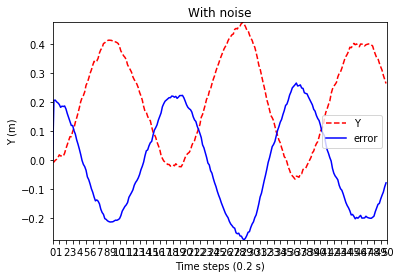

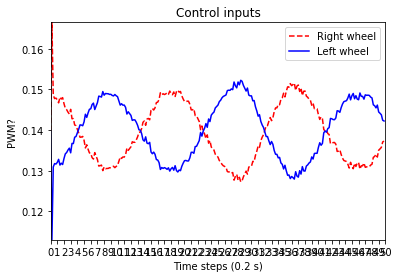

In [113]:
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from unit_test import UnitTestPositionPID

# Write here the values of the kinematics parameters you calculated during the activities.
# This test will give you an idea of the behavior of the controller you wrote above.
# Try to play with the parameters, change R, the baseline all the PID variables,
# What change in the resulting graphs? Why?

R = 0.0318
baseline = 0.1
gain = 0.6
trim = 0.0
v_0 = 0.2
y_ref = 0.2

# unit test input R, baseline, v_0, gain, trim, PIDController
unit_test = UnitTestPositionPID(R, baseline, v_0, y_ref, gain, trim, PIDController) 
unit_test.test()


### Build the Activity

In [ ]:
! cd .. && dts exercises build

### Run the activity on the Duckiebot



Open the terminal, navigate into the exercise folder
In the first terminal you have to run the exercises with the standard `dts exercises` command:

In [ ]:
! cd .. && dts exercises test --duckiebot_name ![DB_NAME] 

In [ ]:
! dts keyboard_control ![DB_NAME]

#### Terminal 3

In the third terminal you have to attach the container where the  activity is running. 

#### Terminal 2

In this terminal you have to open the `keyboard_control` in order to drive you Duckiebot.


In [ ]:
! docker -H ![DB_NAME].local exec -it agent /bin/bash

Now you are attached to the Docker container that is running on the robot. From this terminal launch the python script that allows you to proceed witht the calibration as shown below. You will be asked to place your Duckiebot on a lane and move it along a straight line using the `keyboard_control`.

In [ ]:
python3 /code/exercise_ws/src/interaction_pkg/src/interaction_node.py